<h1>Оглавление<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.-Загрузка-и-предобработка-данных" data-toc-modified-id="1.-Загрузка-и-предобработка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>1. Загрузка и предобработка данных</a></span><ul class="toc-item"><li><span><a href="#1.1-Вывод" data-toc-modified-id="1.1-Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>1.1 Вывод</a></span></li></ul></li><li><span><a href="#2.-Исследовательских-анализ-данных" data-toc-modified-id="2.-Исследовательских-анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>2. Исследовательских анализ данных</a></span><ul class="toc-item"><li><span><a href="#2.1-Распределение-средних-eCPM-ов-пользователей" data-toc-modified-id="2.1-Распределение-средних-eCPM-ов-пользователей-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>2.1 Распределение средних eCPM-ов пользователей</a></span></li><li><span><a href="#2.2-Распределение-eCPM-ов-по-городам" data-toc-modified-id="2.2-Распределение-eCPM-ов-по-городам-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>2.2 Распределение eCPM-ов по городам</a></span></li><li><span><a href="#2.3-Распределение-eCPM-ов-по-версиям-ОС" data-toc-modified-id="2.3-Распределение-eCPM-ов-по-версиям-ОС-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>2.3 Распределение eCPM-ов по версиям ОС</a></span></li><li><span><a href="#2.4-Распределение-eCPM-в-течение-суток" data-toc-modified-id="2.4-Распределение-eCPM-в-течение-суток-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>2.4 Распределение eCPM в течение суток</a></span></li><li><span><a href="#2.5-Распределение-доходов-по-городам" data-toc-modified-id="2.5-Распределение-доходов-по-городам-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>2.5 Распределение доходов по городам</a></span></li><li><span><a href="#2.6-Распределение-доходов-по-версиям-ОС" data-toc-modified-id="2.6-Распределение-доходов-по-версиям-ОС-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>2.6 Распределение доходов по версиям ОС</a></span></li></ul></li><li><span><a href="#3.-Проверка-гипотез" data-toc-modified-id="3.-Проверка-гипотез-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>3. Проверка гипотез</a></span><ul class="toc-item"><li><span><a href="#3.1-О-равенстве-доходов-10-й-и-11-й-версий-ОС" data-toc-modified-id="3.1-О-равенстве-доходов-10-й-и-11-й-версий-ОС-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>3.1 О равенстве доходов 10-й и 11-й версий ОС</a></span></li><li><span><a href="#3.2-О-равенстве-среднего-eCPM-в-ночное-и-утреннее-время" data-toc-modified-id="3.2-О-равенстве-среднего-eCPM-в-ночное-и-утреннее-время-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>3.2 О равенстве среднего eCPM в ночное и утреннее время</a></span></li></ul></li><li><span><a href="#4.-Общий-вывод" data-toc-modified-id="4.-Общий-вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>4. Общий вывод</a></span></li></ul></div>

# Исследование показов рекламы в мобильной игре

Перед нами стоит задача провести исследование показов рекламы с целью выявления зависимости eCPM (дохода за тысячу рекламных показов) от географии пользователя, версии ОС и других факторов. Для этого проанализируем данные о доходах с рекламы для пользователей в США в период с 03.02.2022 по 07.02.2022.

## 1. Загрузка и предобработка данных

Импортируем все библиотеки, которые потребуются нам в дальнейшей работе, и ознакомимся с данными:

In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')
from scipy import stats as st

df = pd.read_csv('C:/Users/79215/Desktop/project/us events ad_revenue filtered 03.02-07.02.csv')
display(df.head())
df.info()
print('\n' + 'Количество дубликатов:', df.duplicated().sum()) 

,profile_id,os_version,device_manufacturer,device_model,device_type,device_locale,event_name,event_json,event_datetime,event_timestamp,event_receive_datetime,event_receive_timestamp,connection_type,operator_name,country_iso_code,city
0,JLjpGzDHBQm,11,Samsung,Galaxy Tab S6,tablet,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-04 20:02:28,1643994148,2022-02-06 17:58:19,1644159499,wifi,NaN,US,Norwalk
1,JLjpGzDHBQm,11,Samsung,Galaxy Tab S6,tablet,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-04 20:02:45,1643994165,2022-02-06 17:58:19,1644159499,wifi,NaN,US,Norwalk
2,JLkVacrzHY6,11,Google,Pixel 2,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-05 17:53:05,1644072785,2022-02-06 16:59:29,1644155969,wifi,Verizon,US,Charlotte
3,JMC6wG3cX0f,10,Samsung,Galaxy S9,phone,en_US,c_ad_revenue,"{""ad_type"":""int"",""placement"":""next_level"",""vie...",2022-02-06 17:09:01,1644156541,2022-02-06 17:09:24,1644156564,wifi,T-Mobile,US,Cocoa
4,JLzWWTJfi1b,10,Samsung,Galaxy S9,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-06 17:15:38,1644156938,2022-02-06 17:16:16,1644156976,cell,Verizon,US,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 860079 entries, 0 to 860078
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   profile_id               860065 non-null  object
 1   os_version               860079 non-null  object
 2   device_manufacturer      860079 non-null  object
 3   device_model             860079 non-null  object
 4   device_type              860079 non-null  object
 5   device_locale            860079 non-null  object
 6   event_name               860079 non-null  object
 7   event_json               860079 non-null  object
 8   event_datetime           860079 non-null  object
 9   event_timestamp          860079 non-null  int64 
 10  event_receive_datetime   860079 non-null  object
 11  event_receive_timestamp  860079 non-null  int64 
 12  connection_type          860079 non-null  object
 13  operator_name            841200 non-null  object
 14  country_iso_code    

**Итак, в нашей таблице есть ряд проблем:**
- наличие пропусков в столбцах `profile_id`, `operator_name`, `city`;
- колонки с датами (`event_datetime`, `event_receive_datetime`) имеют тип данных `object`, а колонки `event_timestamp` и `event_receive_timestamp` отображают дату/время события в формате `unix time` и соответственно имеют тип данных `int`;
- наличие потенциально неинформативных колонок (`event_name`, `device_locale`, `country_iso_code`);
- столбец `event_json`, содержащий данные о событии показа рекламы, в виде словаря.

Далее поработаем над этими вопросами.

**РАБОТА С ПРОПУСКАМИ**

В 11 строках отсутствует информация об id пользователя. От всего массива данных это мизерная доля, поэтому мы можем безболезненно от них избавиться.

В колонке `operator_name` тоже не так много пропусков, но отказываться почти от 20 тысяч строк мы не станем, а заполним отсутствующие значения "заглушками". Аналогично поступим с пропусками в столбце `city`:

In [2]:
df.dropna(subset = ['profile_id'], inplace = True)
df = df.fillna('unknown')

**РАБОТА С ТИПАМИ ДАННЫХ**

Приведём все колонки с датой/временем к типу `datetime`:

In [3]:
df['event_datetime'] = pd.to_datetime(df['event_datetime'])
df['event_receive_datetime'] = pd.to_datetime(df['event_receive_datetime'])
df['event_timestamp'] = pd.to_datetime(df['event_timestamp'], unit='s')
df['event_receive_timestamp'] = pd.to_datetime(df['event_receive_timestamp'], unit='s')
df[['event_datetime', 'event_timestamp', 'event_receive_datetime', 'event_receive_timestamp']].head()

,event_datetime,event_timestamp,event_receive_datetime,event_receive_timestamp
0,2022-02-04 20:02:28,2022-02-04 17:02:28,2022-02-06 17:58:19,2022-02-06 14:58:19
1,2022-02-04 20:02:45,2022-02-04 17:02:45,2022-02-06 17:58:19,2022-02-06 14:58:19
2,2022-02-05 17:53:05,2022-02-05 14:53:05,2022-02-06 16:59:29,2022-02-06 13:59:29
3,2022-02-06 17:09:01,2022-02-06 14:09:01,2022-02-06 17:09:24,2022-02-06 14:09:24
4,2022-02-06 17:15:38,2022-02-06 14:15:38,2022-02-06 17:16:16,2022-02-06 14:16:16


Теперь мы видим, что между форматами datetime и timestamp разница в три часа. Так как datetime отображается в таком виде, в котором был установлен (без влияния часового пояса), мы будем работать именно с ним, а фактически дублирующие столбцы удалим:

In [4]:
df.drop(['event_timestamp', 'event_receive_timestamp'], axis=1, inplace=True)

**РАБОТА С НЕИНФОРМАТИВНЫМИ КОЛОНКАМИ**

Первые пять строк датафрейма показали нам, что в столбцах `event_name`, `device_locale` и `country_iso_code` значения в строках не меняются. Посмотрим на информационное разнообразие этих колонок:

In [5]:
print('Количество уникальных значений в event_name:', df['event_name'].nunique())
print('Количество уникальных значений в device_locale:', df['device_locale'].nunique())
print('Количество уникальных значений в country_iso_code:', df['country_iso_code'].nunique())

Количество уникальных значений в event_name: 1
Количество уникальных значений в device_locale: 9
Количество уникальных значений в country_iso_code: 1


Получается, колонки `event_name` и `country_iso_code` для нас бесполезны - во всей таблице хранится информация о прибыли с рекламы в США. Значит, можно эти колонки удалить:

In [6]:
df.drop(['event_name', 'country_iso_code'], axis=1, inplace=True)

**РАБОТА СО СЛОВАРЁМ**

Важная для нашего исследования колонка `event_json` хранит информацию в словаре. Преобразуем его в столбцы и посмотрим на результат:

In [7]:
df['event_json'] = df['event_json'].map(eval)
df = df.join(pd.DataFrame(df.pop('event_json').values.tolist()))
display(df.head())
df.info()

,profile_id,os_version,device_manufacturer,device_model,device_type,device_locale,event_datetime,event_receive_datetime,connection_type,operator_name,...,ads_ltv,ecpm_sma,normalized_ecpm_sma,value,currency,ad_country_code,network_name,ad_unit_id,ad_network_placement,creativeId
0,JLjpGzDHBQm,11,Samsung,Galaxy Tab S6,tablet,en_US,2022-02-04 20:02:28,2022-02-06 17:58:19,wifi,unknown,...,0.487877,0.511508,0.511508,0.000510,USD,US,Google AdMob,64c6b1114ea8c1cc,ca-app-pub-7511632782617496/8825263691,CJ3XirfD5vUCFYPnKAUdG3MOYQ
1,JLjpGzDHBQm,11,Samsung,Galaxy Tab S6,tablet,en_US,2022-02-04 20:02:45,2022-02-06 17:58:19,wifi,unknown,...,0.488387,0.511389,0.511389,0.000510,USD,US,Google AdMob,64c6b1114ea8c1cc,ca-app-pub-7511632782617496/8825263691,CNa-lL_D5vUCFZrpKAUdU2QBDQ
2,JLkVacrzHY6,11,Google,Pixel 2,phone,en_US,2022-02-05 17:53:05,2022-02-06 16:59:29,wifi,Verizon,...,0.678479,0.928597,0.928597,0.002386,USD,US,APPLOVIN_EXCHANGE,64c6b1114ea8c1cc,banner_regular,pandora-58
3,JMC6wG3cX0f,10,Samsung,Galaxy S9,phone,en_US,2022-02-06 17:09:01,2022-02-06 17:09:24,wifi,T-Mobile,...,0.013894,13.782633,13.893784,0.013894,USD,US,AppLovin,3ab7705b07ebb75f,inter_regular,13045364
4,JLzWWTJfi1b,10,Samsung,Galaxy S9,phone,en_US,2022-02-06 17:15:38,2022-02-06 17:16:16,cell,Verizon,...,0.060571,1.660282,1.660282,0.006828,USD,US,Google AdMob,64c6b1114ea8c1cc,ca-app-pub-7511632782617496/6197324251,CMTi5e-h6_UCFUdVwQodt9EIMw


<class 'pandas.core.frame.DataFrame'>
Int64Index: 860065 entries, 0 to 860078
Data columns (total 28 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   profile_id              860065 non-null  object        
 1   os_version              860065 non-null  object        
 2   device_manufacturer     860065 non-null  object        
 3   device_model            860065 non-null  object        
 4   device_type             860065 non-null  object        
 5   device_locale           860065 non-null  object        
 6   event_datetime          860065 non-null  datetime64[ns]
 7   event_receive_datetime  860065 non-null  datetime64[ns]
 8   connection_type         860065 non-null  object        
 9   operator_name           860065 non-null  object        
 10  city                    860065 non-null  object        
 11  ad_type                 860051 non-null  object        
 12  placement               860051

Как мы видим, в 14 строках в столбце `event_json` значения в ключах отсутствовали. В таком случае, эти строки для нас малоинформативны, а значит можем их удалить:

In [8]:
df = df.dropna()

Проверим столбцы `currency` и `ad_country_code` на информативность:

In [9]:
print('Количество уникальных значений в event_name:', df['currency'].nunique())
print('Количество уникальных значений в device_locale:', df['ad_country_code'].nunique())

Количество уникальных значений в event_name: 1
Количество уникальных значений в device_locale: 9


`currency` можно удалить:

In [10]:
df.drop('currency', axis=1, inplace=True)

### 1.1 Вывод

В результате предобработки мы:
- отработали пропуски;
- изменили тип данных у колонок с датами;
- избавились от лишних столбцов;
- вынесли данные из словаря в `event_json` в отдельные столбцы.

Можно приступать к анализу.

## 2. Исследовательских анализ данных

Далее мы будем анализировать eCPM (цену за тысячу показов), поэтому создадим столбец с этим критерием: 

In [11]:
df['ecpm'] = df['revenue'] * 1000

Посмотрим на распределение значений по разным форматам рекламы:

In [12]:
print('Распределение eCPM у баннеров:')
print(df.query('ad_type == "banner"')['ecpm'].describe())
print()
print('Распределение eCPM у полноэкранной рекламы:')
print(df.query('ad_type == "int"')['ecpm'].describe())
print()
print('Распределение eCPM у рекламного видео:')
print(df.query('ad_type == "rv"')['ecpm'].describe())

Распределение eCPM у баннеров:
count    815961.000000
mean          0.744122
std           1.401291
min           0.000064
25%           0.041667
50%           0.494196
75%           0.531158
max          63.750000
Name: ecpm, dtype: float64

Распределение eCPM у полноэкранной рекламы:
count    37608.000000
mean        36.207609
std         48.187133
min          0.000000
25%         11.965651
50%         21.398855
75%         37.040040
max        937.195984
Name: ecpm, dtype: float64

Распределение eCPM у рекламного видео:
count    6482.000000
mean       65.051165
std        75.926894
min         0.160666
25%        28.025083
50%        31.468961
75%        80.640000
max       916.205811
Name: ecpm, dtype: float64


Полученные данные говорят следующее:
- по каждому формату имеются выбросы;
- **баннеры во много раз чаще приносят доход, но имеют самые маленькие показатели eCPM**;
- в случае с видео - наоборот, **прибыль поступает существенно реже, чем по остальным рекламным форматам, но средний и медианный eCPM значительно выше**.

В связи с этим интересно сравнить суммарные значения eCPM по всем рекламным типам:

In [13]:
print('Сумма eCPM по баннерам:', round(df.query('ad_type == "banner"')['ecpm'].sum()))
print('Сумма eCPM по полноэкранной рекламе:', round(df.query('ad_type == "int"')['ecpm'].sum()))
print('Сумма eCPM по рекламному видео:', round(df.query('ad_type == "rv"')['ecpm'].sum()))

Сумма eCPM по баннерам: 607175
Сумма eCPM по полноэкранной рекламе: 1361696
Сумма eCPM по рекламному видео: 421662


Таким образом, за пять дней имеющейся выборки **наибольший суммарный eCPM у полноэкранной рекламы**.

Далее посмотрим на распределение средних eCPM-ов пользователей.

### 2.1 Распределение средних eCPM-ов пользователей

Посчитаем средний eCPM на пользователя по каждому формату рекламы:

In [14]:
mean_ecpm = df.pivot_table(index = 'profile_id', columns = 'ad_type', values = 'ecpm')
mean_ecpm.head()

ad_type,banner,int,rv
profile_id,,,
JL00qCZH1HV,3.183940,NaN,NaN
JL015rw9vmN,0.929444,38.418749,28.24
JL01aCdFTJy,0.557475,12.532779,NaN
JL04ODuw9UP,1.001155,25.922416,80.64
JL06OWhBYxn,0.041042,3.376565,NaN


Из-за разного масштаба данных у рекламных форматов построим три отдельных графика для каждого типа *(в цветах лого Uga Dooga 😊)*:

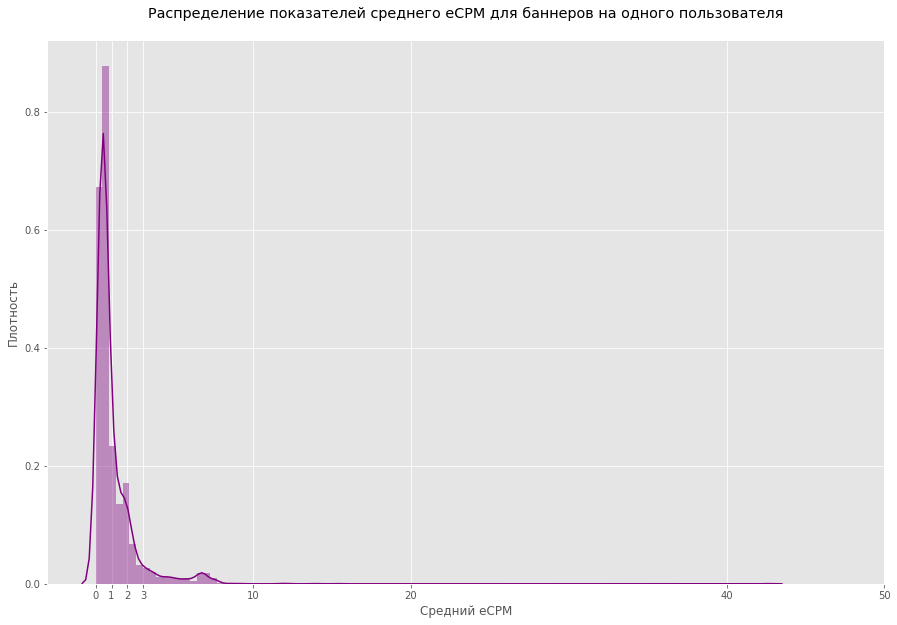

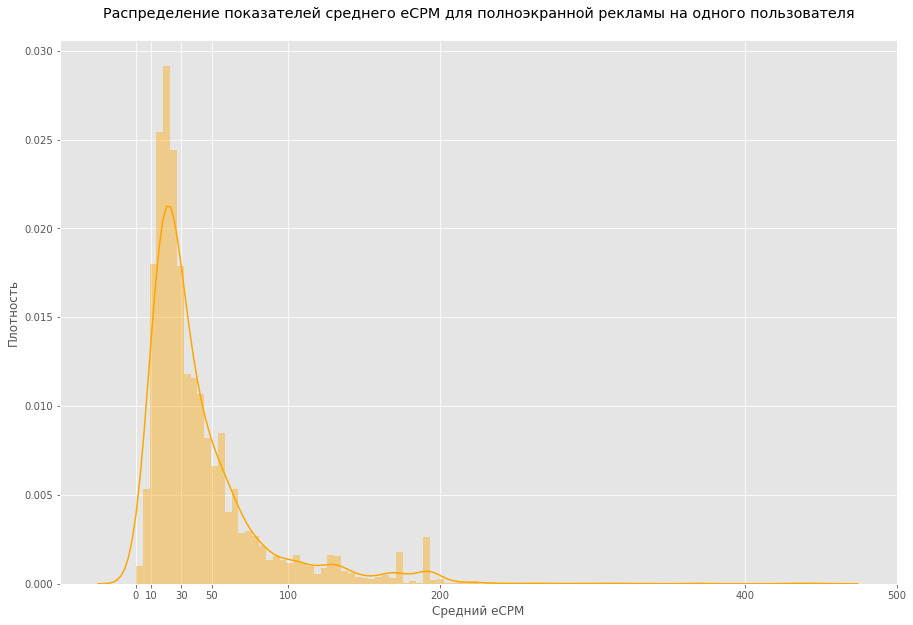

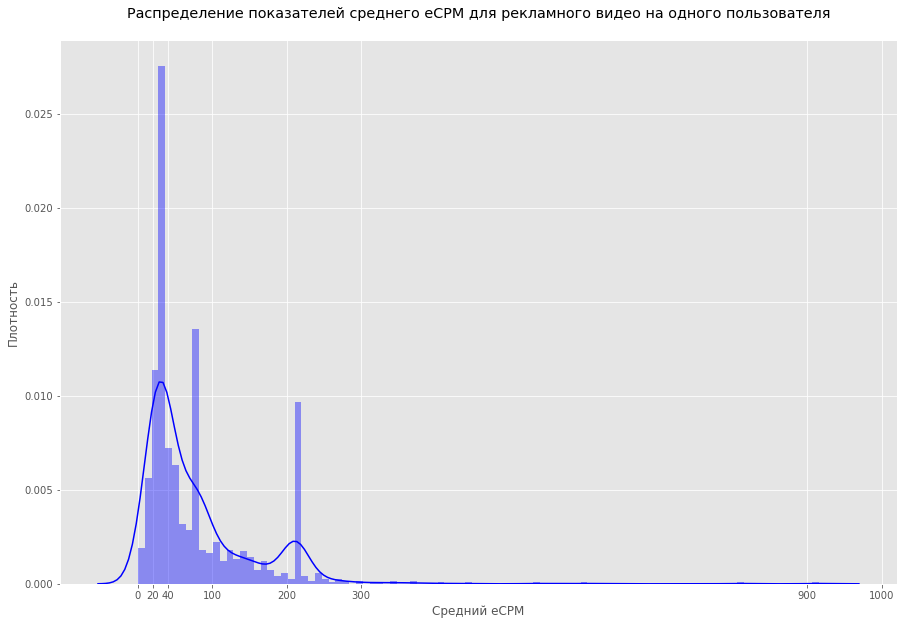

In [15]:
plt.figure(figsize=(15, 10))
plt.style.use('ggplot') 
mean_ecpm_banner = sns.distplot(mean_ecpm['banner'], color='purple', bins=100)
mean_ecpm_banner.set_xticks([0, 1, 2, 3, 10, 20, 40, 50])
mean_ecpm_banner.set_title('Распределение показателей среднего eCPM для баннеров на одного пользователя' + '\n') 
mean_ecpm_banner.set_xlabel('Средний eCPM') 
mean_ecpm_banner.set_ylabel('Плотность')

plt.figure(figsize=(15, 10))
mean_ecpm_banner = sns.distplot(mean_ecpm['int'], color='orange', bins=100)
mean_ecpm_banner.set_xticks([0, 10, 30, 50, 100, 200, 400, 500])
mean_ecpm_banner.set_title('Распределение показателей среднего eCPM для полноэкранной рекламы на одного пользователя' + '\n') 
mean_ecpm_banner.set_xlabel('Средний eCPM') 
mean_ecpm_banner.set_ylabel('Плотность')

plt.figure(figsize=(15, 10))
mean_ecpm_banner = sns.distplot(mean_ecpm['rv'], color='blue', bins=100)
mean_ecpm_banner.set_xticks([0, 20, 40, 100, 200, 300, 900, 1000])
mean_ecpm_banner.set_title('Распределение показателей среднего eCPM для рекламного видео на одного пользователя' + '\n') 
mean_ecpm_banner.set_xlabel('Средний eCPM') 
mean_ecpm_banner.set_ylabel('Плотность');

**ВЫВОД**
- большинство средних eCPM на пользователя **по баннерам лежит от 0 до 1**;
- основная часть средних eCPM на пользователя **по полноэкранной рекламе приходится между 10 и 30**;
- **у видео** средний eCPM на пользователя, в основном, находится **в диапазоне 20-40**, но дополнительно наблюдаются всплески в пределах 80 и 220.

Таким образом, **наибольший средний eCPM на пользователя приходится на рекламное видео**. Тем не менее, у полноэкранной рекламы данный показатель распределен более стабильно и широко - от 10 до 60. 

### 2.2 Распределение eCPM-ов по городам

Теперь посмотрим, как распределены средние eCPM по городам:

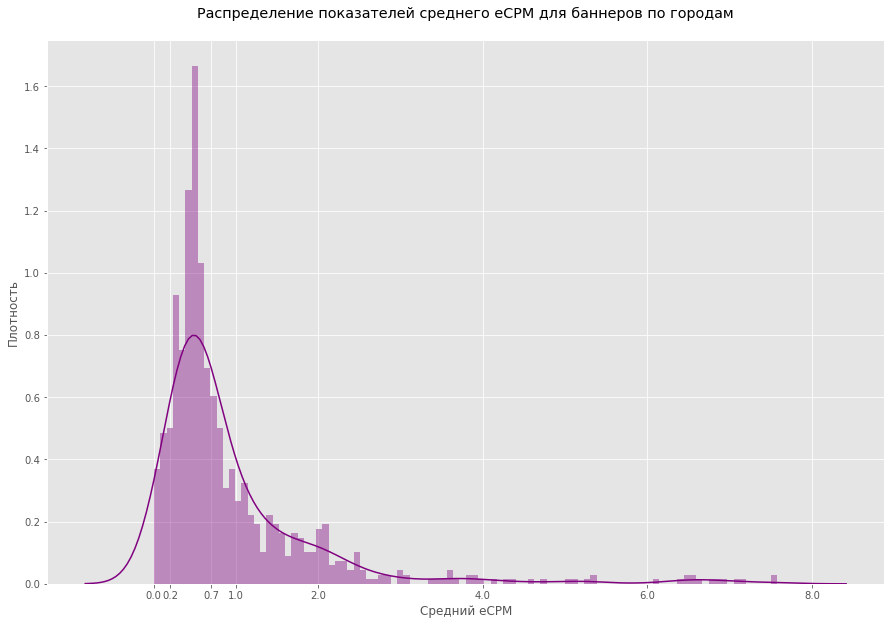

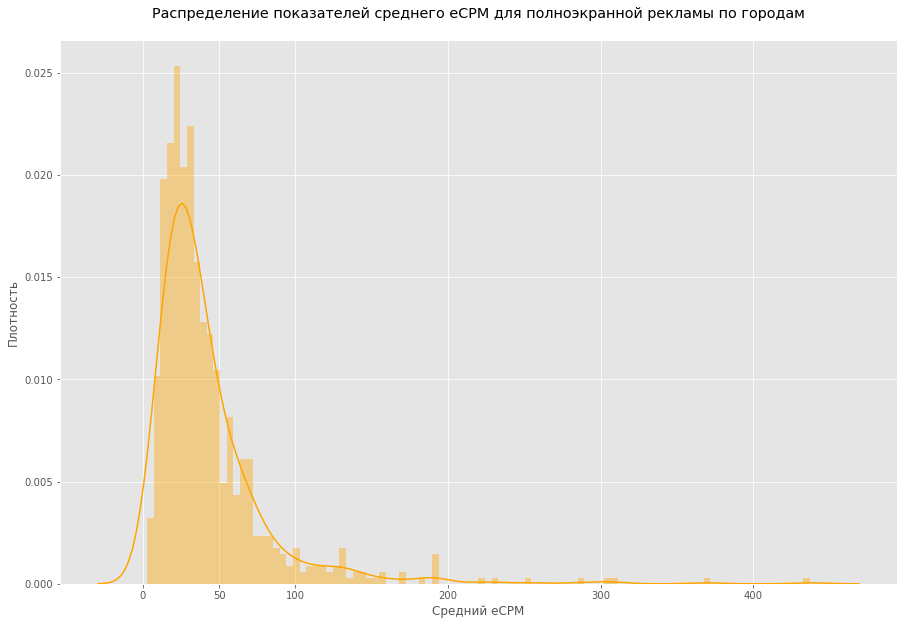

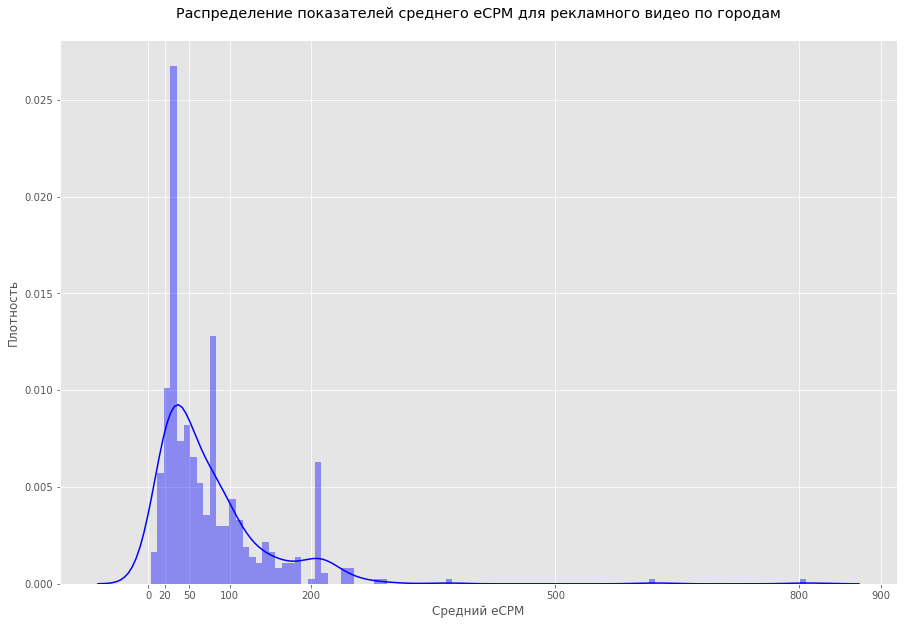

In [16]:
# построение сводной таблицы со средними значениями eCPM по городам для каждого рекламного формата
city_ecpm = df.pivot_table(index = 'city', columns = 'ad_type', values = 'ecpm')

plt.figure(figsize=(15, 10))
city_ecpm_banner = sns.distplot(city_ecpm['banner'], color='purple', bins=100)
city_ecpm_banner.set_xticks([0, 0.2, 0.7, 1, 2, 4, 6, 8])
city_ecpm_banner.set_title('Распределение показателей среднего eCPM для баннеров по городам' + '\n') 
city_ecpm_banner.set_xlabel('Средний eCPM') 
city_ecpm_banner.set_ylabel('Плотность')

plt.figure(figsize=(15, 10))
city_ecpm_banner = sns.distplot(city_ecpm['int'], color='orange', bins=100)
city_ecpm_banner.set_xticks([0, 50, 100, 200, 300, 400])
city_ecpm_banner.set_title('Распределение показателей среднего eCPM для полноэкранной рекламы по городам' + '\n') 
city_ecpm_banner.set_xlabel('Средний eCPM') 
city_ecpm_banner.set_ylabel('Плотность')

plt.figure(figsize=(15, 10))
city_ecpm_banner = sns.distplot(city_ecpm['rv'], color='blue', bins=100)
city_ecpm_banner.set_xticks([0, 20, 50, 100, 200, 500, 800, 900])
city_ecpm_banner.set_title('Распределение показателей среднего eCPM для рекламного видео по городам' + '\n') 
city_ecpm_banner.set_xlabel('Средний eCPM') 
city_ecpm_banner.set_ylabel('Плотность');

**ВЫВОД**
- чаще всего **у баннеров** средний eCPM в каждом городе составляет **0.2 - 0.7**;
- **у полноэкранной рекламы этот показатель по городам лежит между 10 и 50**;
- **у видео - в диапазоне 20-50**.

В распределении по городам полноэкранная реклама и видео демонстрируют успешность показателей среднего eCPM. 

### 2.3 Распределение eCPM-ов по версиям ОС

Для начала посмотрим на общее распределение eCPM по версиям ОС:

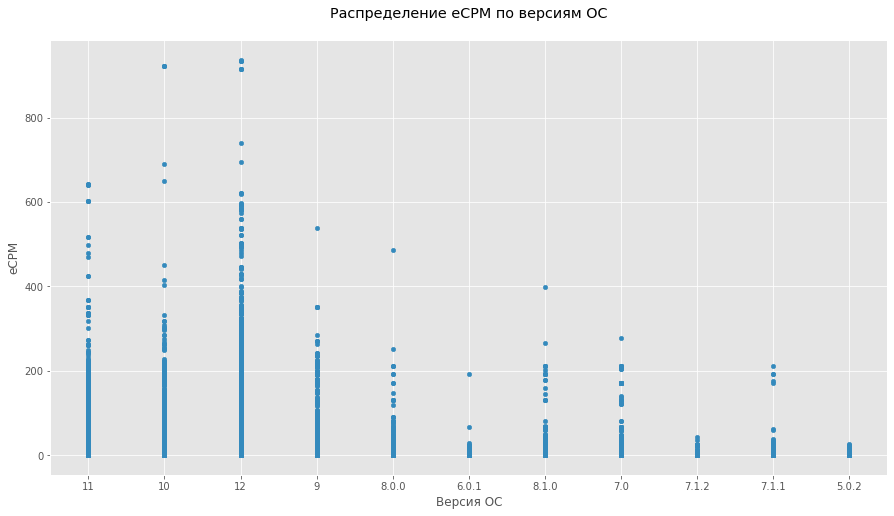

In [17]:
scatter = df.plot(x='os_version', y='ecpm', kind='scatter', figsize=(15, 8))
scatter.set_title('Распределение eCPM по версиям ОС' + '\n') 
scatter.set_xlabel('Версия ОС')
scatter.set_ylabel('eCPM');

Как мы видим по общим данным, **самые высокие eCPM у версии 12**, за ней идут 11-я и 10-я версии.

Разобьём eCPM по рекламным форматам:

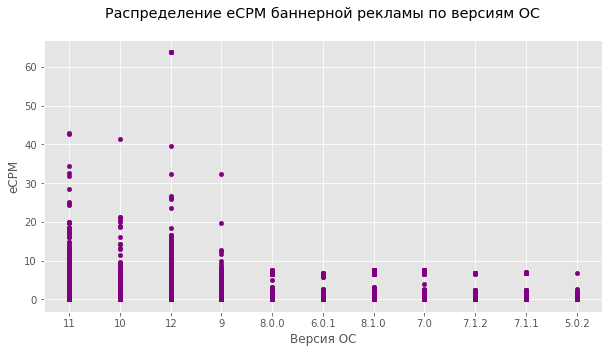

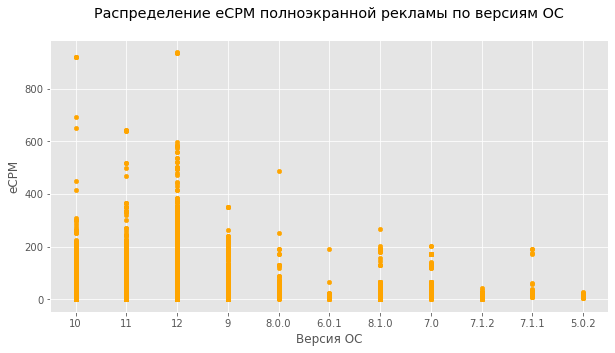

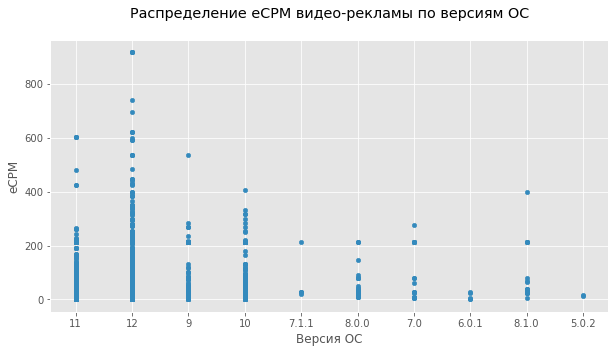

In [18]:
banner = df.query('ad_type == "banner"').plot(x='os_version', y='ecpm', kind='scatter', figsize=(10, 5), color='purple')
banner.set_title('Распределение eCPM баннерной рекламы по версиям ОС' + '\n') 
banner.set_xlabel('Версия ОС')
banner.set_ylabel('eCPM')

int_ecpm = df.query('ad_type == "int"').plot(x='os_version', y='ecpm', kind='scatter', figsize=(10, 5), color='orange')
int_ecpm.set_title('Распределение eCPM полноэкранной рекламы по версиям ОС' + '\n') 
int_ecpm.set_xlabel('Версия ОС')
int_ecpm.set_ylabel('eCPM')

rv = df.query('ad_type == "rv"').plot(x='os_version', y='ecpm', kind='scatter', figsize=(10, 5))
rv.set_title('Распределение eCPM видео-рекламы по версиям ОС' + '\n') 
rv.set_xlabel('Версия ОС')
rv.set_ylabel('eCPM');

**В разбивке по рекламным типам лидерство 10-й, 11-й и 12-й версий ОС в eCPM сохраняется**

### 2.4 Распределение eCPM в течение суток

Разделим все пользовательские события на те, которые произошли ночью, утром, днём и вечером.

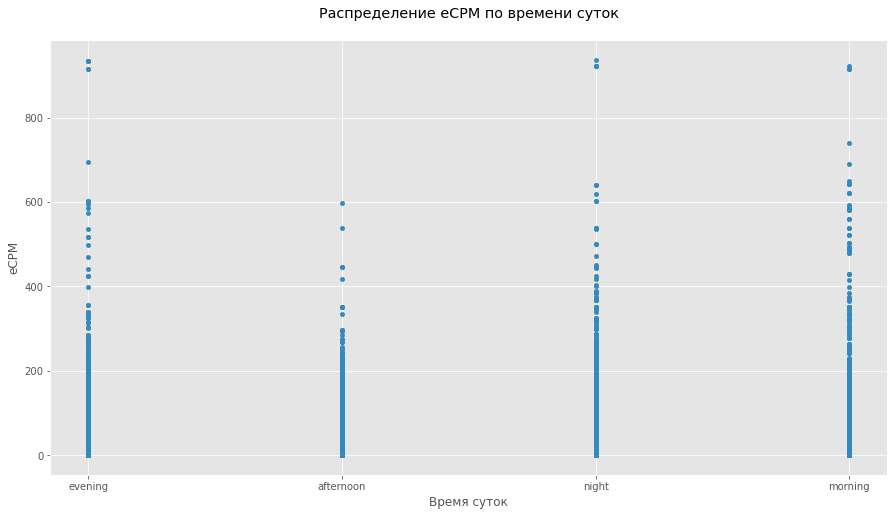

In [19]:
df['event_time'] = pd.DatetimeIndex(df['event_datetime']).hour #выделение в отдельную колонку 'event_time' час события

# объявление функции time_of_day(), которая возвращает время суток в зависимости от часа события
def time_of_day(time):
    if 6 > time >= 0:
        return 'night'
    if 12 > time >= 6:
        return 'morning'
    if 18 > time >= 12:
        return 'afternoon'
    if 23 >= time >= 18:
        return 'evening'

# применение функции time_of_day() к колонке 'event_time' и сохранение результатов в колонке 'time_of_day'
df['time_of_day'] = df['event_time'].apply(time_of_day)

time_of_day = df.plot(x='time_of_day', y='ecpm', kind='scatter', figsize=(15, 8))
time_of_day.set_title('Распределение eCPM по времени суток' + '\n') 
time_of_day.set_xlabel('Время суток')
time_of_day.set_ylabel('eCPM');

Очевидно, что **наибольшая плотность высоких eCPM приходится на утро (с 6 до 12) и ночь (с 0 до 6)**. Дневное время (с 12 до 18) не отличается высокими показателями eCPM.

Выделим более узкие (трёхчасовые) промежутки времени и посмотрим на распределение значений в них:

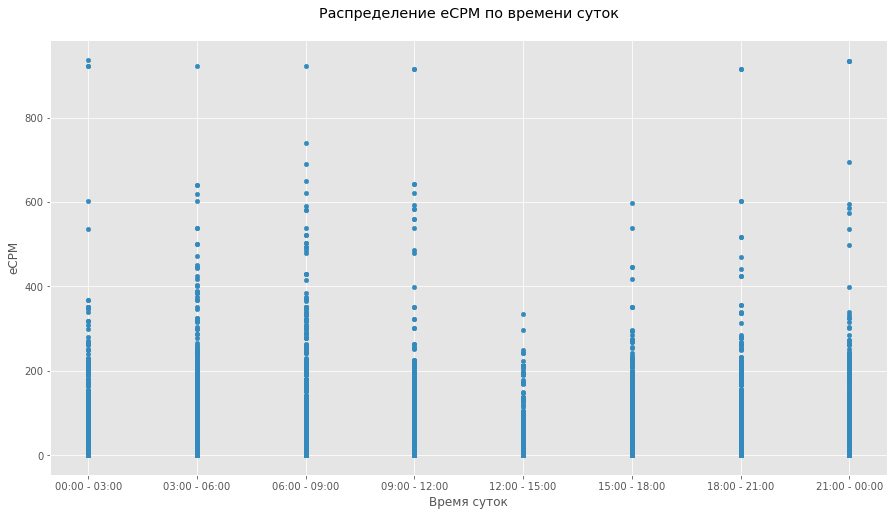

In [20]:
# объявление функции time_of_day(), которая возвращает временной промежуток в зависимости от часа события
def time_of_day(time):
    if 3 > time >= 0:
        return '00:00 - 03:00'
    if 6 > time >= 3:
        return '03:00 - 06:00'
    if 9 > time >= 6:
        return '06:00 - 09:00'
    if 12 > time >= 9:
        return '09:00 - 12:00'
    if 15 > time >= 12:
        return '12:00 - 15:00'
    if 18 > time >= 15:
        return '15:00 - 18:00'
    if 21 > time >= 18:
        return '18:00 - 21:00'
    if 23 >= time >= 21:
        return '21:00 - 00:00'

# применение функции time_of_day() к колонке 'event_time'
df['event_time'] = df['event_time'].apply(time_of_day)

time_of_day = df.sort_values(by='event_time').plot(x='event_time', y='ecpm', kind='scatter', figsize=(15, 8))
time_of_day.set_title('Распределение eCPM по времени суток' + '\n') 
time_of_day.set_xlabel('Время суток')
time_of_day.set_ylabel('eCPM');

**С 03:00 до 09:00 - время самых высоких eCPM.**

### 2.5 Распределение доходов по городам

Посчитаем суммарный доход в каждом городе по рекламным форматам:

In [21]:
city_revenue = df.pivot_table(index = 'city', columns = 'ad_type', values = 'revenue', aggfunc='sum')
city_revenue

ad_type,banner,int,rv
city,,,
Aberdeen,0.035434,0.235772,0.062670
Abilene,0.040964,0.266595,NaN
Addison,0.000069,NaN,NaN
Afton,0.148412,0.648299,NaN
Akron,0.135073,1.390444,1.232896
...,...,...,...
Ypsilanti,0.482270,2.400673,0.080640
Yukon,0.283591,1.754764,0.106985
Yuma,0.043905,0.106201,NaN


Как мы видим, значительный доход приходится на пользователей, у которых не указан город. Посчитаем, **какой процент доходов содержит информацию о городе юзера:**

In [22]:
print('Содержит информацию о городе клиента: {:.1%}'.format(df.query('city != "unknown"')['revenue'].sum() / df['revenue'].sum()))

Содержит информацию о городе клиента: 63.4%


Итого более трети дохода невозможно соотнести с городом нахождения пользователя. Исключим их из дальнейшего анализа по населённым пунктам.

In [23]:
city_revenue = city_revenue.query('city != "unknown"')

Но прежде чем оценить доходы по городам для каждого формата отдельно, посмотрим сначала на ситуацию в целом: 

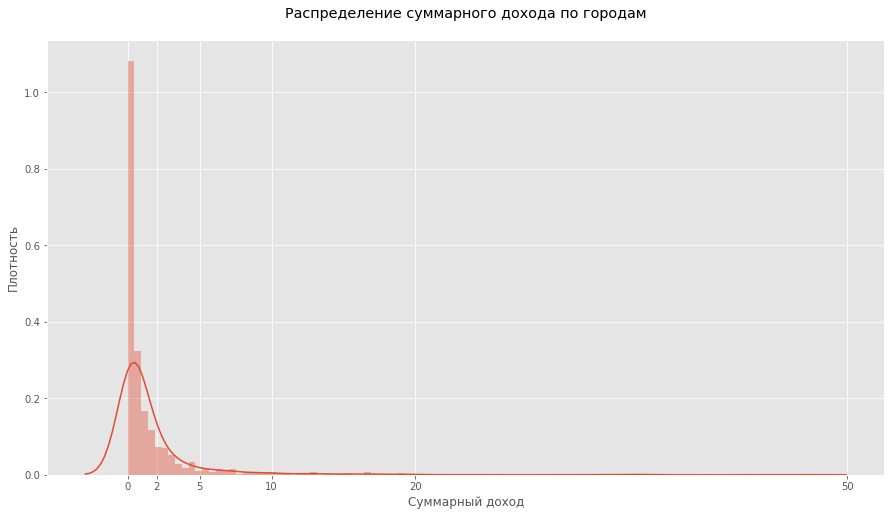

In [24]:
# получение среза с суммами дохода в каждом городе
citys = df.query('city != "unknown"').groupby('city')['revenue'].sum().reset_index()

plt.figure(figsize=(15, 8))
citys_plot = sns.distplot(citys['revenue'], bins=100)
citys_plot.set_xticks([0, 2, 5, 10, 20, 50])
citys_plot.set_title('Распределение суммарного дохода по городам' + '\n') 
citys_plot.set_xlabel('Суммарный доход') 
citys_plot.set_ylabel('Плотность');

**Основной суммарный доход по городам между 0 и 1.** Но есть среди городов и чемпионы, доходы которых превышают в десятки раз. Посмотрим на них:

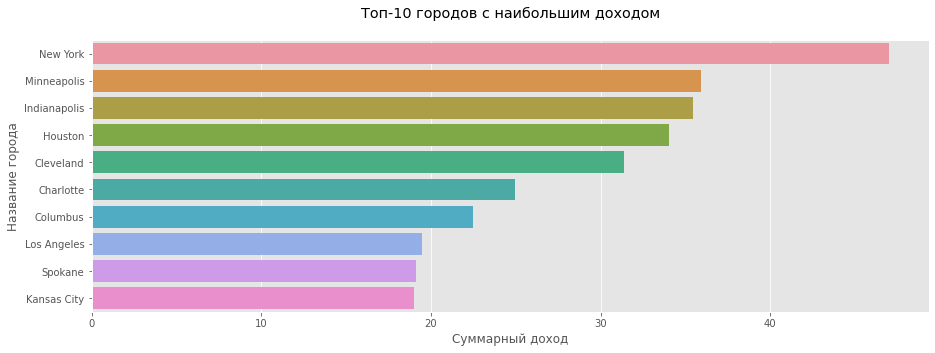

In [25]:
citys = citys.sort_values(by='revenue', ascending=False).head(10)

plt.figure(figsize=(15, 5))
top_10 = sns.barplot(y='city', x='revenue', data=citys)
top_10.set_title('Топ-10 городов с наибольшим доходом' + '\n') 
top_10.set_xlabel('Суммарный доход') 
top_10.set_ylabel('Название города');

Ожидаемо в топе крупные города с большим количеством жителей/пользователей. 

Теперь сравним данные с разбивкой по форматам:

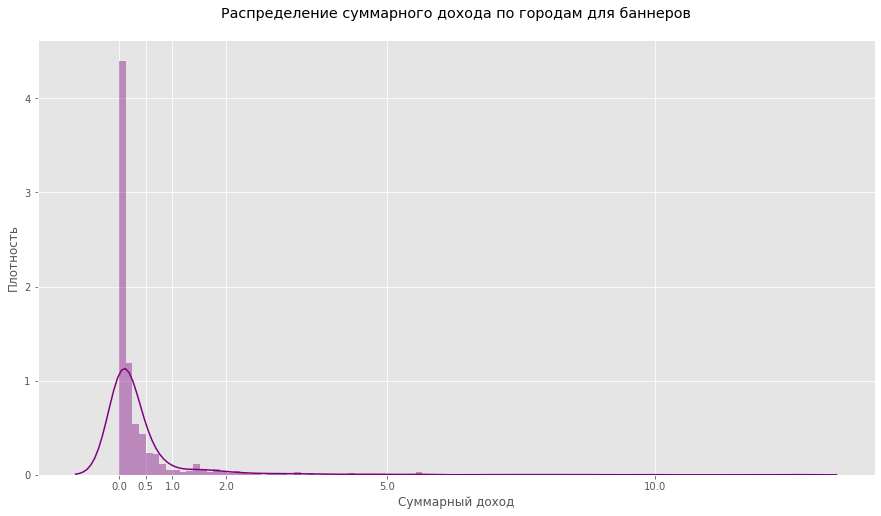

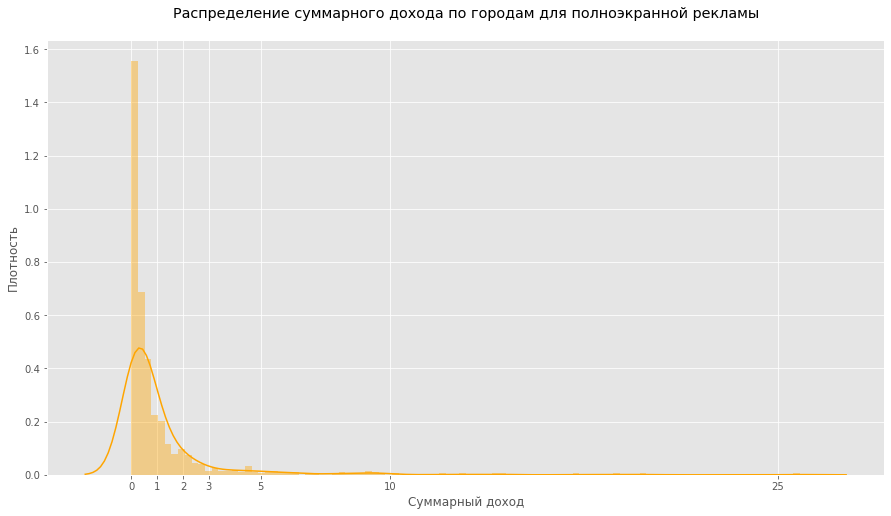

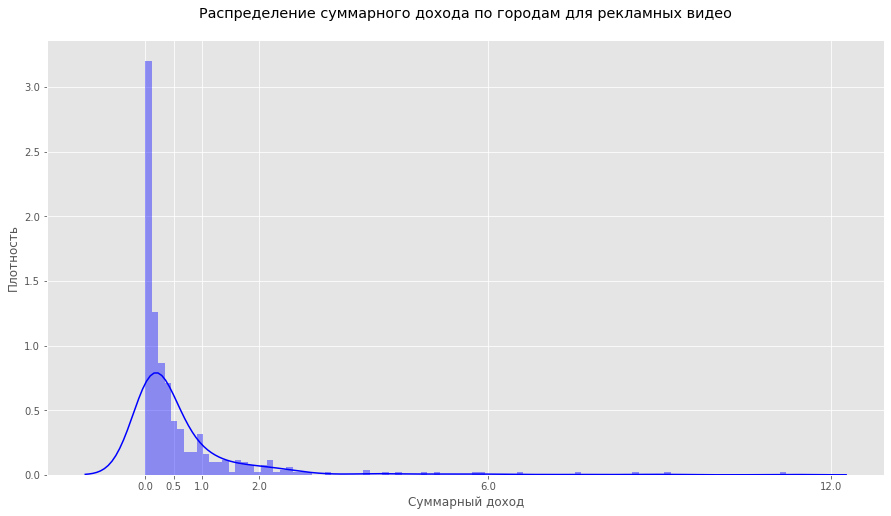

In [26]:
plt.figure(figsize=(15, 8))
citys_banner = sns.distplot(city_revenue['banner'], bins=100, color='purple')
citys_banner.set_xticks([0, 0.5, 1, 2, 5, 10])
citys_banner.set_title('Распределение суммарного дохода по городам для баннеров' + '\n') 
citys_banner.set_xlabel('Суммарный доход') 
citys_banner.set_ylabel('Плотность')

plt.figure(figsize=(15, 8))
citys_int = sns.distplot(city_revenue['int'], bins=100, color='orange')
citys_int.set_xticks([0, 1, 2, 3, 5, 10, 25])
citys_int.set_title('Распределение суммарного дохода по городам для полноэкранной рекламы' + '\n') 
citys_int.set_xlabel('Суммарный доход') 
citys_int.set_ylabel('Плотность')

plt.figure(figsize=(15, 8))
citys_rv = sns.distplot(city_revenue['rv'], bins=100, color='blue')
citys_rv.set_xticks([0, 0.5, 1, 2, 6, 12])
citys_rv.set_title('Распределение суммарного дохода по городам для рекламных видео' + '\n') 
citys_rv.set_xlabel('Суммарный доход') 
citys_rv.set_ylabel('Плотность');

**ВЫВОД**

По всем рекламным форматам суммарный доход в каждом городе, в основном, **приходится до 0.5**.


### 2.6 Распределение доходов по версиям ОС

Посмотрим на общие значения:

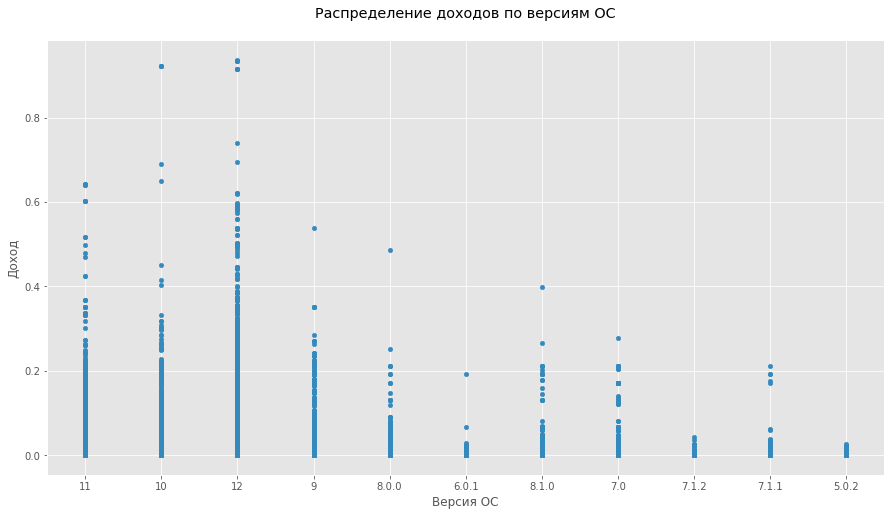

In [27]:
scatter_revenue = df.plot(x='os_version', y='revenue', kind='scatter', figsize=(15, 8))
scatter_revenue.set_title('Распределение доходов по версиям ОС' + '\n') 
scatter_revenue.set_xlabel('Версия ОС')
scatter_revenue.set_ylabel('Доход');

И отдельно по форматам:

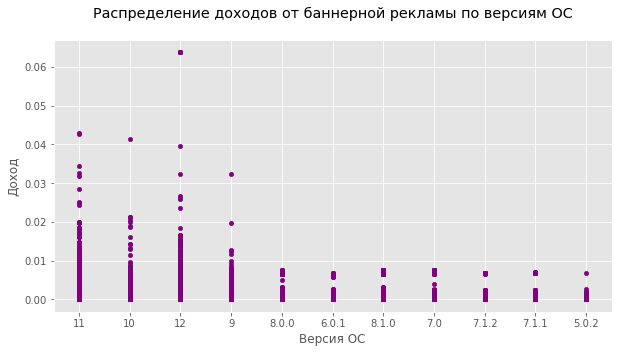

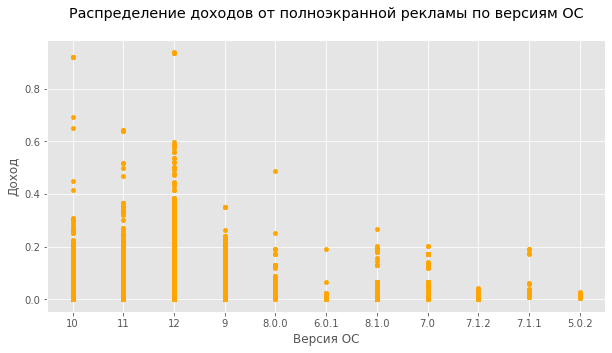

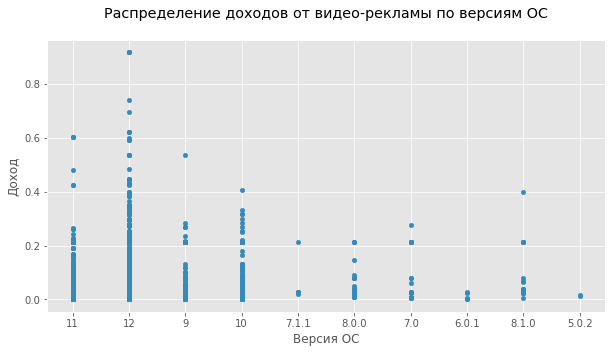

In [28]:
scatter_banner = df.query('ad_type == "banner"').plot(x='os_version', y='revenue', kind='scatter', figsize=(10, 5), color='purple')
scatter_banner.set_title('Распределение доходов от баннерной рекламы по версиям ОС' + '\n') 
scatter_banner.set_xlabel('Версия ОС')
scatter_banner.set_ylabel('Доход')

scatter_int = df.query('ad_type == "int"').plot(x='os_version', y='revenue', kind='scatter', figsize=(10, 5), color='orange')
scatter_int.set_title('Распределение доходов от полноэкранной рекламы по версиям ОС' + '\n') 
scatter_int.set_xlabel('Версия ОС')
scatter_int.set_ylabel('Доход')

scatter_rv = df.query('ad_type == "rv"').plot(x='os_version', y='revenue', kind='scatter', figsize=(10, 5))
scatter_rv.set_title('Распределение доходов от видео-рекламы по версиям ОС' + '\n') 
scatter_rv.set_xlabel('Версия ОС')
scatter_rv.set_ylabel('Доход');

**По всем форматам наибольшие доходы поступили по 12-й версии ОС.** Следующие по доходности - 10 и 11 версии. А вот насколько их доходность сопоставима, есть смысл проверить. Для этого выдвинем и проверим гипотезу. 

## 3. Проверка гипотез

### 3.1 О равенстве доходов 10-й и 11-й версий ОС

Лидерство 12-й версии по доходности бесспорно, а вот имеют ли доходы от 10-й и 11-й статистическую значимость нам предстоит узнать. 

**Нулевая гипотеза в данном случае будет звучать так: "Средний доход от 10-й версии ОС, равен среднему доходу от 11-й версии ОС".**

Альтернативная гипотеза: "Средний доход от 10-й версии ОС не равен среднему доходу от 11-й версии ОС".

In [29]:
# объявление критического уровня статистической значимости в 5%
alpha = 0.05 

# методу scipy.stats.ttest_ind() передадим выборки по доходам от 10 и 11 версий ОС:
result = st.ttest_ind(df[df['os_version'] == "10"]['revenue'], df[df['os_version'] == "11"]['revenue'])
print('p-значение:', result.pvalue)

# сравнение полученного уровня значимости с установленным критическим
if (result.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.070510997577547e-25
Отвергаем нулевую гипотезу


Воспользуемся тестом Левена и проверим, имеют ли группы одинаковые отклонения:

In [30]:
st.levene(df[df['os_version'] == "10"]['revenue'], df[df['os_version'] == "11"]['revenue'])

LeveneResult(statistic=139.38369529738793, pvalue=3.680697893955588e-32)

**ВЫВОД**

Итак, **pvalue гораздо меньше заданного нами критического уровня статистической значимости, значит нулевая гипотеза отвергнута**: средний доход от 10-й и 11-й версий ОС имеют между собой существенную разницу.

### 3.2 О равенстве среднего eCPM в ночное и утреннее время

На этапе анализа распределения eCPM в течение суток мы определили, что наибольшие показатели этого критерия наблюдаются в периоды 03:00 - 06:00 и 06:00 - 09:00. Проверим, есть ли статистически важная разница у значений в этих временных промежутках.

**Нулевая гипотеза в данном случае будет звучать так: "Средний eCPM в период 03:00 - 06:00 равен среднему eCPM в период 06:00 - 09:00".**

Альтернативная гипотеза: "Средний eCPM в период 03:00 - 06:00 не равен среднему eCPM в период 06:00 - 09:00".

In [31]:
# методу scipy.stats.ttest_ind() передадим выборки по eCPM в периоды 03:00 - 06:00 и 06:00 - 09:00:
result = st.ttest_ind(df[df['event_time'] == "03:00 - 06:00"]['ecpm'], df[df['event_time'] == "06:00 - 09:00"]['ecpm'])
print('p-значение:', result.pvalue)

# сравнение полученного уровня значимости с установленным критическим
if (result.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.0047363133632642215
Отвергаем нулевую гипотезу


In [32]:
st.levene(df[df['event_time'] == "03:00 - 06:00"]['ecpm'], df[df['event_time'] == "06:00 - 09:00"]['ecpm'])

LeveneResult(statistic=8.55681784996027, pvalue=0.003442544112897007)

**ВЫВОД**

**Нулевая гипотеза отвергнута**: средние eCPM в периоды 03:00 - 06:00 и 06:00 - 09:00 не равны.

## 4. Общий вывод

Мы проанализировали данные о доходах с рекламы для пользователей в США в период с 03.02.2022 по 07.02.2022 и пришли к следующим выводам:
- **Баннеры:**
        - во много раз чаще приносят доход, но имеют самые маленькие показатели eCPM;
        - средний eCPM на одного пользователя чаще всего находится между 0 и 1;
        - средний eCPM по городу, в основном, составляет 0.2-0.7.
- **Полноэкранная реклама:**
        - имеет наибольший суммарный eCPM за выбранный период;
        - основная часть средних eCPM на пользователя приходится между 10 и 30;
        - средний eCPM по городу находится в пределах 10-50
- **Видео:**
        - прибыль поступает реже, чем по остальным рекламным форматам, но средний eCPM значительно выше;
        - средний eCPM на пользователя находится в диапазоне 20-40, но также наблюдаются всплески в пределах 80 и 220;
        - средний eCPM по городу находится в диапазоне 20-50.

- В распределении на одного пользователя и по городам полноэкранная реклама и видео демонстрируют успешность показателей среднего eCPM.
- Самые высокие eCPM и доходы *(в том числе по каждому рекламному формату в отдельности)* у 12-й версии ОС, за которой идут 11-я и 10-я версии. Дополнительно проверка гипотезы продемонстрировала, что средние доходы 10-й и 11-й версий ОС не совпадают. 
- Самые большие показатели eCPM ночью и утром, а именно в период с 03:00 до 09:00. Но проверка гипотезы показала, что средние eCPM в периоды *03:00 - 06:00* и *06:00 - 09:00* не равны.
- Только 63.4% от всех доходов содержат информацию о городе клиента.
- В основном доход по каждому городу *(в том числе по каждому рекламному формату в отдельности)* находится в пределах показателя "1". 
- Города с самыми большими суммарными доходами - *Нью-Йорк, Миннеаполис, Индианаполис*.